In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df_laptop = pd.read_csv("keyword_and_lag_search_analytics_data1.csv")

In [3]:
df_laptop

,date,Sales,lenovo legion,lenovo laptops,lenovo,gaming laptops,legion laptop,lenovo gaming laptops,lenovo legion laptop,lenovo laptop,...,is_month_start,is_month_end,SMA_3,SMA_4,SMA_5,Sales_month,Sales_qtr,contri_week_month,contri_week_quarter,SI_Quarter_week
0,01/07/2018,3.102734e+05,28,69,100,62,28,35,30,48,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.185558,0.054943,0.656799
1,1/14/2018,5.774019e+05,27,66,96,59,27,51,32,46,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.345314,0.102245,0.860645
2,1/21/2018,4.059437e+05,27,66,94,60,26,46,26,46,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.242774,0.071884,0.769455
3,1/28/2018,3.784874e+05,26,67,95,69,19,51,22,46,...,0,0,4.312063e+05,0.000000e+00,0.000,1672106.384,5.647214e+06,0.226354,0.067022,0.654300
4,02/04/2018,4.607665e+05,24,64,88,61,23,45,25,45,...,0,0,4.539443e+05,4.180266e+05,0.000,2376650.170,5.647214e+06,0.193872,0.081592,0.589324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,7/26/2020,1.662375e+06,84,83,77,72,85,74,86,83,...,0,0,1.918020e+06,1.858023e+06,1909535.733,7416435.044,1.548428e+07,0.224147,0.107359,1.361488
134,08/02/2020,1.934459e+06,86,83,79,70,92,90,88,89,...,0,0,1.954986e+06,1.854109e+06,1818893.531,8067844.580,1.548428e+07,0.239774,0.124930,1.641888
135,08/09/2020,2.327555e+06,87,86,80,61,86,65,86,89,...,0,0,1.784856e+06,1.949854e+06,1870178.719,8067844.580,1.548428e+07,0.288498,0.150317,1.893072
136,8/16/2020,2.058943e+06,82,90,82,68,87,80,87,92,...,0,0,1.974796e+06,1.920530e+06,2025394.329,8067844.580,1.548428e+07,0.255204,0.132970,1.770490


In [4]:
#Converting data into DateTime format
df_laptop['date'] = pd.to_datetime(df_laptop['date'], infer_datetime_format = True)

#Reducing Model to only Date and Sales and setting date as index
reducetods = df_laptop[['Sales', 'date']]
indexeddf = reducetods.set_index(['date'])

In [5]:
indexeddf

,Sales
date,
2018-01-07,3.102734e+05
2018-01-14,5.774019e+05
2018-01-21,4.059437e+05
2018-01-28,3.784874e+05
2018-02-04,4.607665e+05
...,...
2020-07-26,1.662375e+06
2020-08-02,1.934459e+06
2020-08-09,2.327555e+06


In [7]:
indexeddf.describe()

,Sales
count,1.380000e+02
mean,9.595989e+05
std,7.103048e+05
min,2.411555e+05
25%,5.096270e+05
50%,6.991697e+05
75%,1.272832e+06
max,5.108560e+06


<AxesSubplot:xlabel='date'>

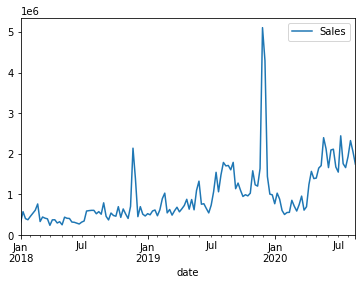

In [8]:
indexeddf.plot()

In [9]:
#Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [14]:
adftest1 = adfuller(indexeddf['Sales'])

In [18]:
adfoutput1 = pd.Series(adftest1[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(adfoutput1)

Test Statistic                  -2.913674
p-value                          0.043781
#Lags Used                       2.000000
Number of Observations Used    135.000000
dtype: float64


In [19]:
#Differencing Data

In [51]:
#Recognising Annualised Nature of Trends, Data is shifted by 52 weeks

indexeddf['Sales Difference 13'] = indexeddf['Sales'] - indexeddf['Sales'].shift(13)
indexeddf['Sales Difference 26'] = indexeddf['Sales'] - indexeddf['Sales'].shift(26)
indexeddf['Sales Difference 52'] = indexeddf['Sales'] - indexeddf['Sales'].shift(52)
indexeddf['Sales Difference 78'] = indexeddf['Sales'] - indexeddf['Sales'].shift(78)

In [54]:
indexeddf

,Sales,Sales Difference 13,Sales Difference 26,Sales Difference 52,Sales Difference 78
date,,,,,
2018-01-07,3.102734e+05,NaN,NaN,NaN,NaN
2018-01-14,5.774019e+05,NaN,NaN,NaN,NaN
2018-01-21,4.059437e+05,NaN,NaN,NaN,NaN
2018-01-28,3.784874e+05,NaN,NaN,NaN,NaN
2018-02-04,4.607665e+05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-26,1.662375e+06,270767.216,1055015.73,595477.34,1043676.24
2020-08-02,1.934459e+06,529878.090,1426580.09,452422.88,1457898.32
2020-08-09,2.327555e+06,677887.730,1771636.39,538537.21,1704135.86


In [42]:
dfdiff52 = indexeddf['Sales Difference 52'].dropna()

In [52]:
dfsd13 = indexeddf.iloc[13:138]
dfsd26 = indexeddf.iloc[26:138]
dfsd52 = indexeddf.iloc[52:138]
dfsd78 = indexeddf.iloc[78:138]

In [48]:
adftest2 = adfuller(dfsd13['Sales Difference 13'])

adfoutput2 = pd.Series(adftest2[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(adfoutput2)

Test Statistic                  -3.398916
p-value                          0.010996
#Lags Used                      13.000000
Number of Observations Used    111.000000
dtype: float64


In [49]:
adftest3 = adfuller(dfsd26['Sales Difference 26'])

adfoutput3 = pd.Series(adftest3[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(adfoutput3)

Test Statistic                  -3.438172
p-value                          0.009724
#Lags Used                       2.000000
Number of Observations Used    109.000000
dtype: float64


In [50]:
adftest4 = adfuller(dfsd52['Sales Difference 52'])

adfoutput4 = pd.Series(adftest4[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(adfoutput4)

Test Statistic                 -3.456962
p-value                         0.009164
#Lags Used                      2.000000
Number of Observations Used    83.000000
dtype: float64


In [55]:
adftest5 = adfuller(dfsd78['Sales Difference 78'])

adfoutput5 = pd.Series(adftest5[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(adfoutput5)

Test Statistic                 -2.765284
p-value                         0.063406
#Lags Used                      2.000000
Number of Observations Used    57.000000
dtype: float64


In [56]:
#As expected, p value most signficant when shift = 52 (1 year).

<AxesSubplot:xlabel='date'>

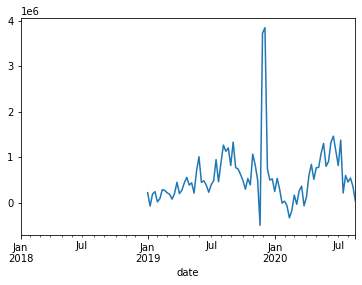

In [57]:
indexeddf['Sales Difference 52'].plot()

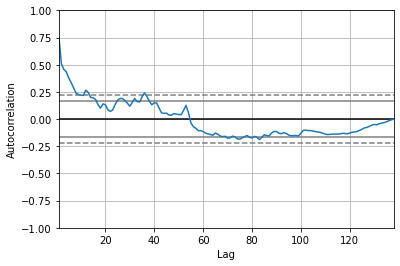

In [59]:
#Autoregressive Model

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(indexeddf['Sales'])
plt.show()

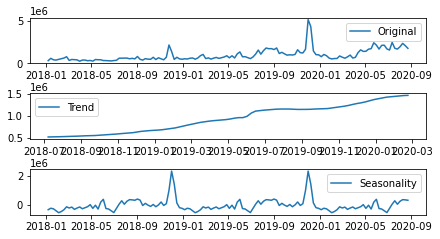

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddf['Sales'])

trend = decomposition.trend
seasonal = decomposition.seasonal

plt.subplot(411)
plt.plot(indexeddf['Sales'], label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.tight_layout(pad = 0.2)

In [65]:
#Obtaining p and q using ACF and PACF

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


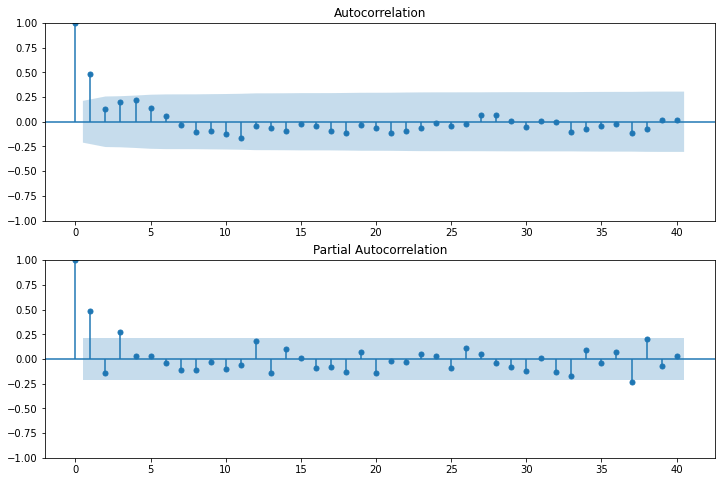

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(indexeddf['Sales Difference 52'].iloc[52:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(indexeddf['Sales Difference 52'].iloc[52:],lags=40,ax=ax2)

In [71]:
#For non-seasonal data
#p = 1 (based on PACF shutdown), d = 1 (based on number of sd shifts), q = 1 (based on ACF shutdown)

from statsmodels.tsa.arima.model import ARIMA

In [72]:
model=ARIMA(indexeddf['Sales'],order=(1,1,1))
model_fit=model.fit()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  138
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1980.391
Date:                Thu, 04 Aug 2022   AIC                           3966.781
Time:                        10:27:10   BIC                           3975.541
Sample:                    01-07-2018   HQIC                          3970.341
                         - 08-23-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6312      0.121      5.203      0.000       0.393       0.869
ma.L1         -0.9395      0.061    -15.304      0.000      -1.060      -0.819
sigma2       2.45e+11   1.16e-12   2.11e+23      0.000    2.45e+11    2.45e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):              5331.43
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               7.05   Skew:                             3.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.49e+38. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

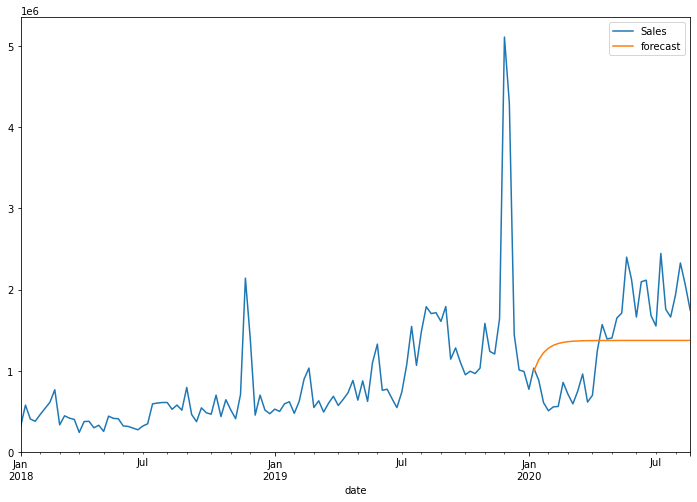

In [75]:
indexeddf['forecast'] = model_fit.predict(start=105,end=138,dynamic=True)
indexeddf[['Sales','forecast']].plot(figsize=(12,8))

In [102]:
model = sm.tsa.statespace.SARIMAX(indexeddf['Sales'],order = (1, 1, 2),seasonal_order = (1,1,2,52))
results = model.fit()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.03255D+00    |proj g|=  6.95720D-02


 This problem is unconstrained.



At iterate    5    f=  8.99443D+00    |proj g|=  5.75124D-03

At iterate   10    f=  8.99205D+00    |proj g|=  1.46632D-02

At iterate   15    f=  8.98825D+00    |proj g|=  4.13137D-03

At iterate   20    f=  8.98792D+00    |proj g|=  7.19844D-05

At iterate   25    f=  8.98790D+00    |proj g|=  7.93544D-04

At iterate   30    f=  8.98788D+00    |proj g|=  3.09965D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     33      1     0     0   3.683D-05   8.988D+00
  F =   8.9878836126407844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<AxesSubplot:xlabel='date'>

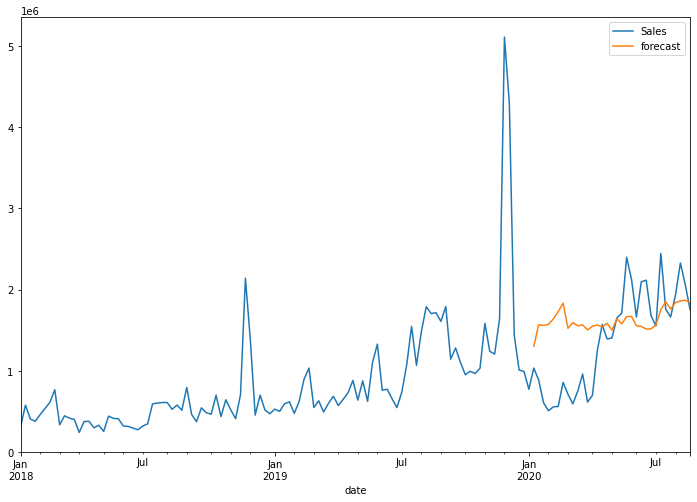

In [101]:
indexeddf['forecast'] = results.predict(start=105,end=138,dynamic=True)
indexeddf[['Sales','forecast']].plot(figsize=(12,8))

In [91]:
from pandas.tseries.offsets import DateOffset
future_dates = [indexeddf.index[-1]+ DateOffset(months=x)for x in range(0,17)]

In [92]:
future_datest_df = pd.DataFrame(index = future_dates[1:],columns = indexeddf.columns)

In [93]:
future_datest_df.tail()

,Sales,Sales Difference 13,Sales Difference 26,Sales Difference 52,Sales Difference 78,forecast
2021-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-23,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-23,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-23,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-23,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
future_df = pd.concat([indexeddf,future_datest_df])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

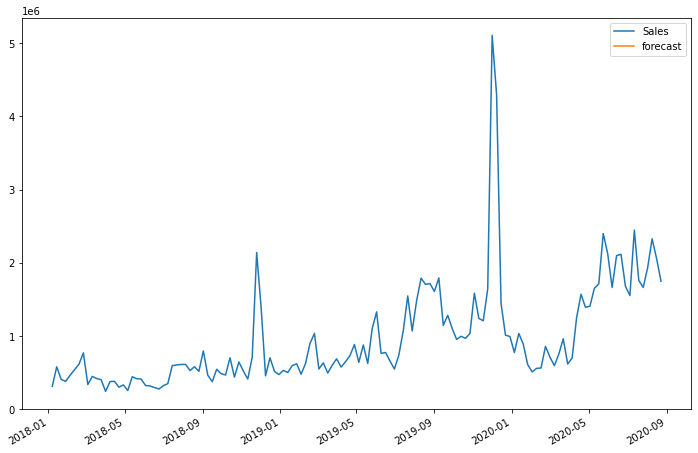

In [103]:
future_df['forecast'] = results.predict(start = 139, end = 156, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))